In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run xy_plot.py

matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(style="white", font_scale=1.8)
figsize = (24, 6)
figsize_large = (24, 12)
bbox_to_anchor = (0.5, -0.1)

In [2]:
metric_types = ['Image Similarity', 'Squared Centroid Distance', 'Text Similarity', 'Vendi', 'Style Loss']
encoders = ['DINOv2', 'DINOv2', 'CLIP', 'DINOv2', 'Vgg19']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=True)
display(metrics_to_include)

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'in'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'in'),
 ('Text Similarity', 'CLIP', 'trigger'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'in'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out'),
 ('Style Loss', 'Vgg19', 'in'),
 ('Style Loss', 'Vgg19', 'trigger'),
 ('Style Loss', 'Vgg19', 'out'),
 ('Style Loss', 'Vgg19', 'base model')]

In [3]:
metrics_to_plot = [(('Text Similarity', 'CLIP', 'out'),
                    ('Image Similarity', 'DINOv2-padding', 'out')),
                   (('Vendi', 'DINOv2', 'trigger'),
                    ('Squared Centroid Distance', 'DINOv2-padding',
                     'trigger')),
                   (('Style Loss', 'Vgg19', 'base model'),
                    ('Image Similarity', 'DINOv2-padding', 'in'))]

# Captions

In [4]:
metrics_file = '../../metrics/captions_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-captions/'
os.makedirs(save_dir, exist_ok=True)

In [5]:
metrics_processed

Config  Algo    Preset        Lr  \
Architecture                                                              
Condition                                                                 
0                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
1                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
2                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
3                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
4                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
...                                       ...   ...       ...       ...   
4207          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4208          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4209          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4210          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4211          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   

                  Dim Alpha Factor   Caption Seed Step  ... Style Loss      \
Architecture                                            ...      Vgg19       
Condition                                               ... base model  in   
0             10000.0   1.0    8.0      .txt    a   30  ...   0.672897 NaN   
1             10000.0   1.0    8.0      .txt    a   30  ...   0.551402 NaN   
2             10000.0   1.0    8.0      .txt    a   30  ...   0.579439 NaN   
3             10000.0   1.0    8.0      .txt    a   30  ...   0.700935 NaN   
4             10000.0   1.0    8.0      .txt    a   30  ...   0.467290 NaN   
...               ...   ...    ...       ...  ...  ...  ...        ...  ..   
4207              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4208              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4209              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4210              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4211              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   

                         Text Similarity                         Vendi  \
Architecture                        CLIP                        DINOv2   
Condition    out trigger              in       out   trigger        in   
0            NaN     NaN        0.915888  0.728972  0.943925  0.112150   
1            NaN     NaN        0.598131  0.532710  0.775701  0.168224   
2            NaN     NaN        0.775701  0.719626  0.990654  0.532710   
3            NaN     NaN        0.588785  0.579439  0.336449  0.140187   
4            NaN     NaN        0.953271  0.504673  0.878505  0.644860   
...           ..     ...             ...       ...       ...       ...   
4207         NaN     NaN        0.738318  0.813084  0.962617  0.775701   
4208         NaN     NaN        0.448598  0.719626  0.168224  0.887850   
4209         NaN     NaN        0.775701  0.476636  0.934579  0.644860   
4210         NaN     NaN        0.822430  0.579439  0.887850  0.887850   
4211         NaN     NaN        0.644860  0.401869  0.439252  0.925234   

                                  
Architecture                      
Condition          out   trigger  
0             0.205607  0.028037  
1             0.897196  0.000000  
2             0.523364  0.018692  
3             0.570093  0.971963  
4             0.485981  0.355140  
...                ...       ...  
4207          0.355140  0.411215  
4208          0.401869  0.149533  
4209          0.616822  0.252336  
4210          0.355140  0.831776  
4211          0.448598  0.654206  

[4212 rows x 30 columns]

In [16]:
metrics_aggregated_all = {}
categories = ['people', 'scene', 'stuffed_toy', 'anime']

for category in categories:
    extra_conodition = {
        'Category': category,
    }
    metrics_aggregated_all[category] = filter_config_and_aggregate(
        metrics_processed, ['Caption'],
        extra_conodition,
        default_keywords=['1001', '1011', '1021', '1034'])
    
shape_mapping = {
    '.txt': 'adjusted tags (default)',
    '.txtdb': 'no tags',
    '.txttags': 'all tags',
}

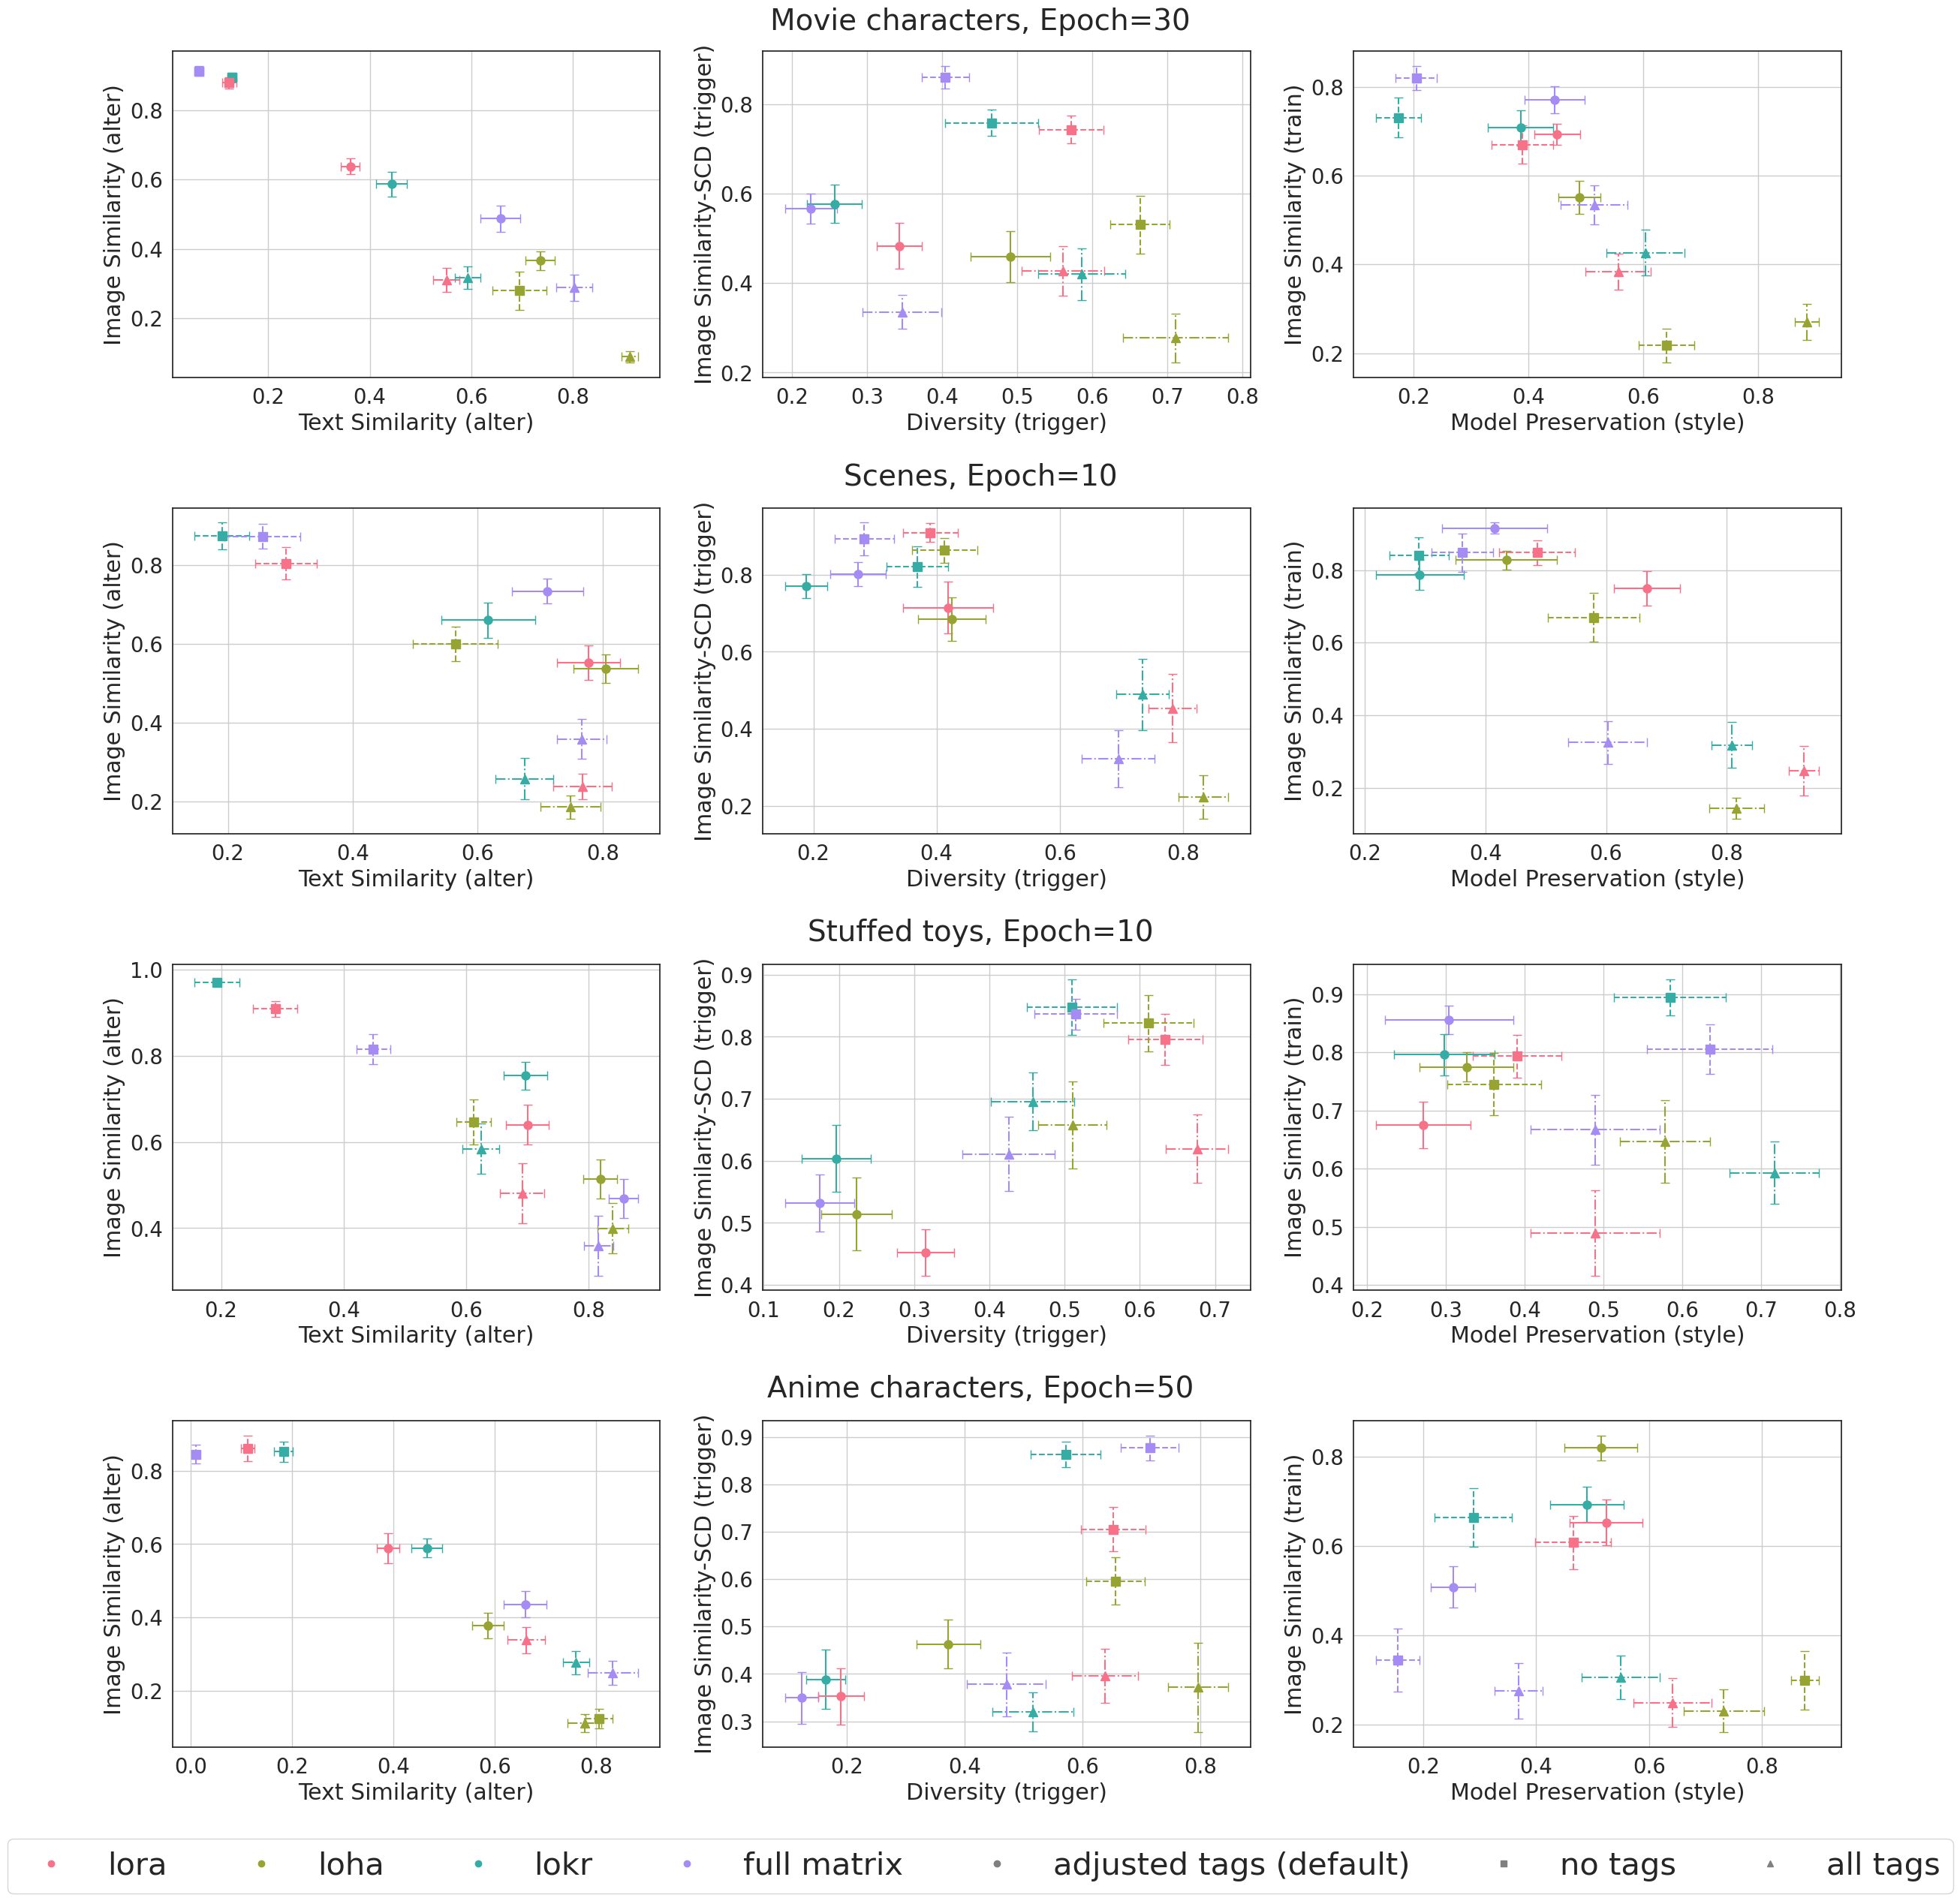

In [17]:
plot_info = [
    (30, 'people', 'Movie characters'),
    (10, 'scene', 'Scenes'),
    (10, 'stuffed_toy', 'Stuffed toys'),
    (50, 'anime', 'Anime characters'),
]

plt.figure(figsize=(24, 24))

for row, (step, category, category_name) in enumerate(plot_info):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.995 - 0.253 * row,
                f'{category_name}, Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(4, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated_all[category],
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Caption',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           fontsize=30,
           bbox_to_anchor=(0.5, -0.045),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'caption_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

In [71]:
category = 'people'

extra_conodition = {
    'Category': category,
}

In [72]:
metrics_aggregated = filter_config_and_aggregate(
    metrics_processed, ['Caption'],
    extra_conodition,
    default_keywords=['1001', '1011', '1021', '1034'])

shape_mapping = {
    '.txt': 'pruned tags (default)',
    '.txtdb': 'no tags',
    '.txttags': 'all tags',
}

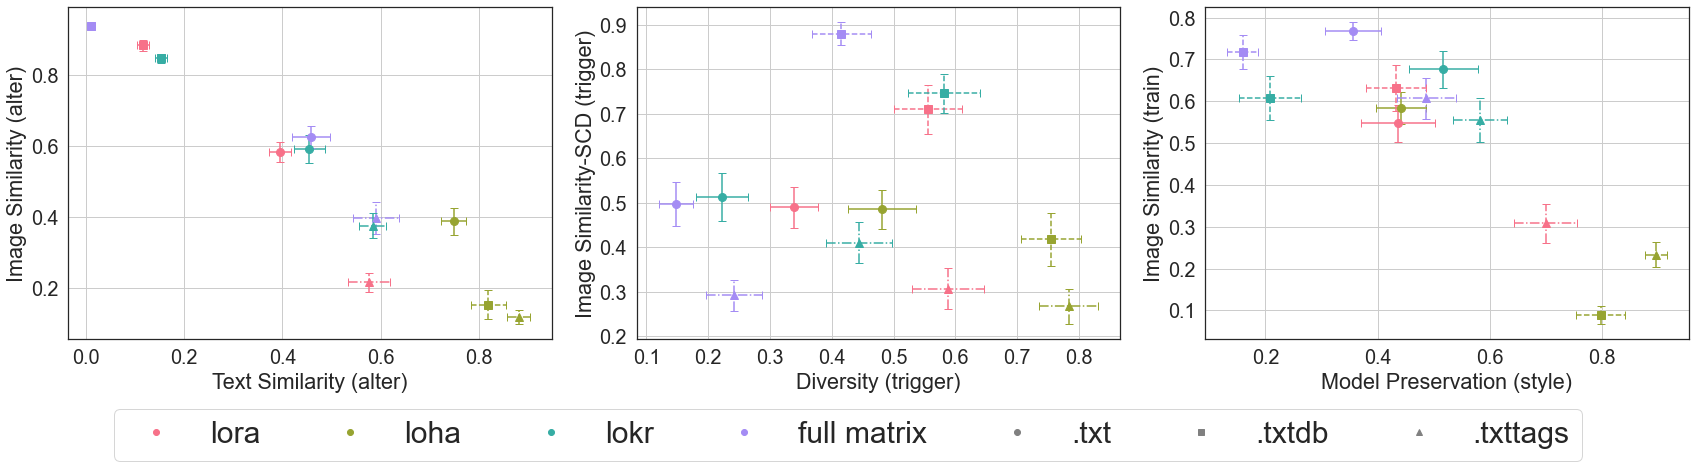

In [73]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Caption',
                                     legend=False,
                                     step=50)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.14),
           fontsize=30,
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

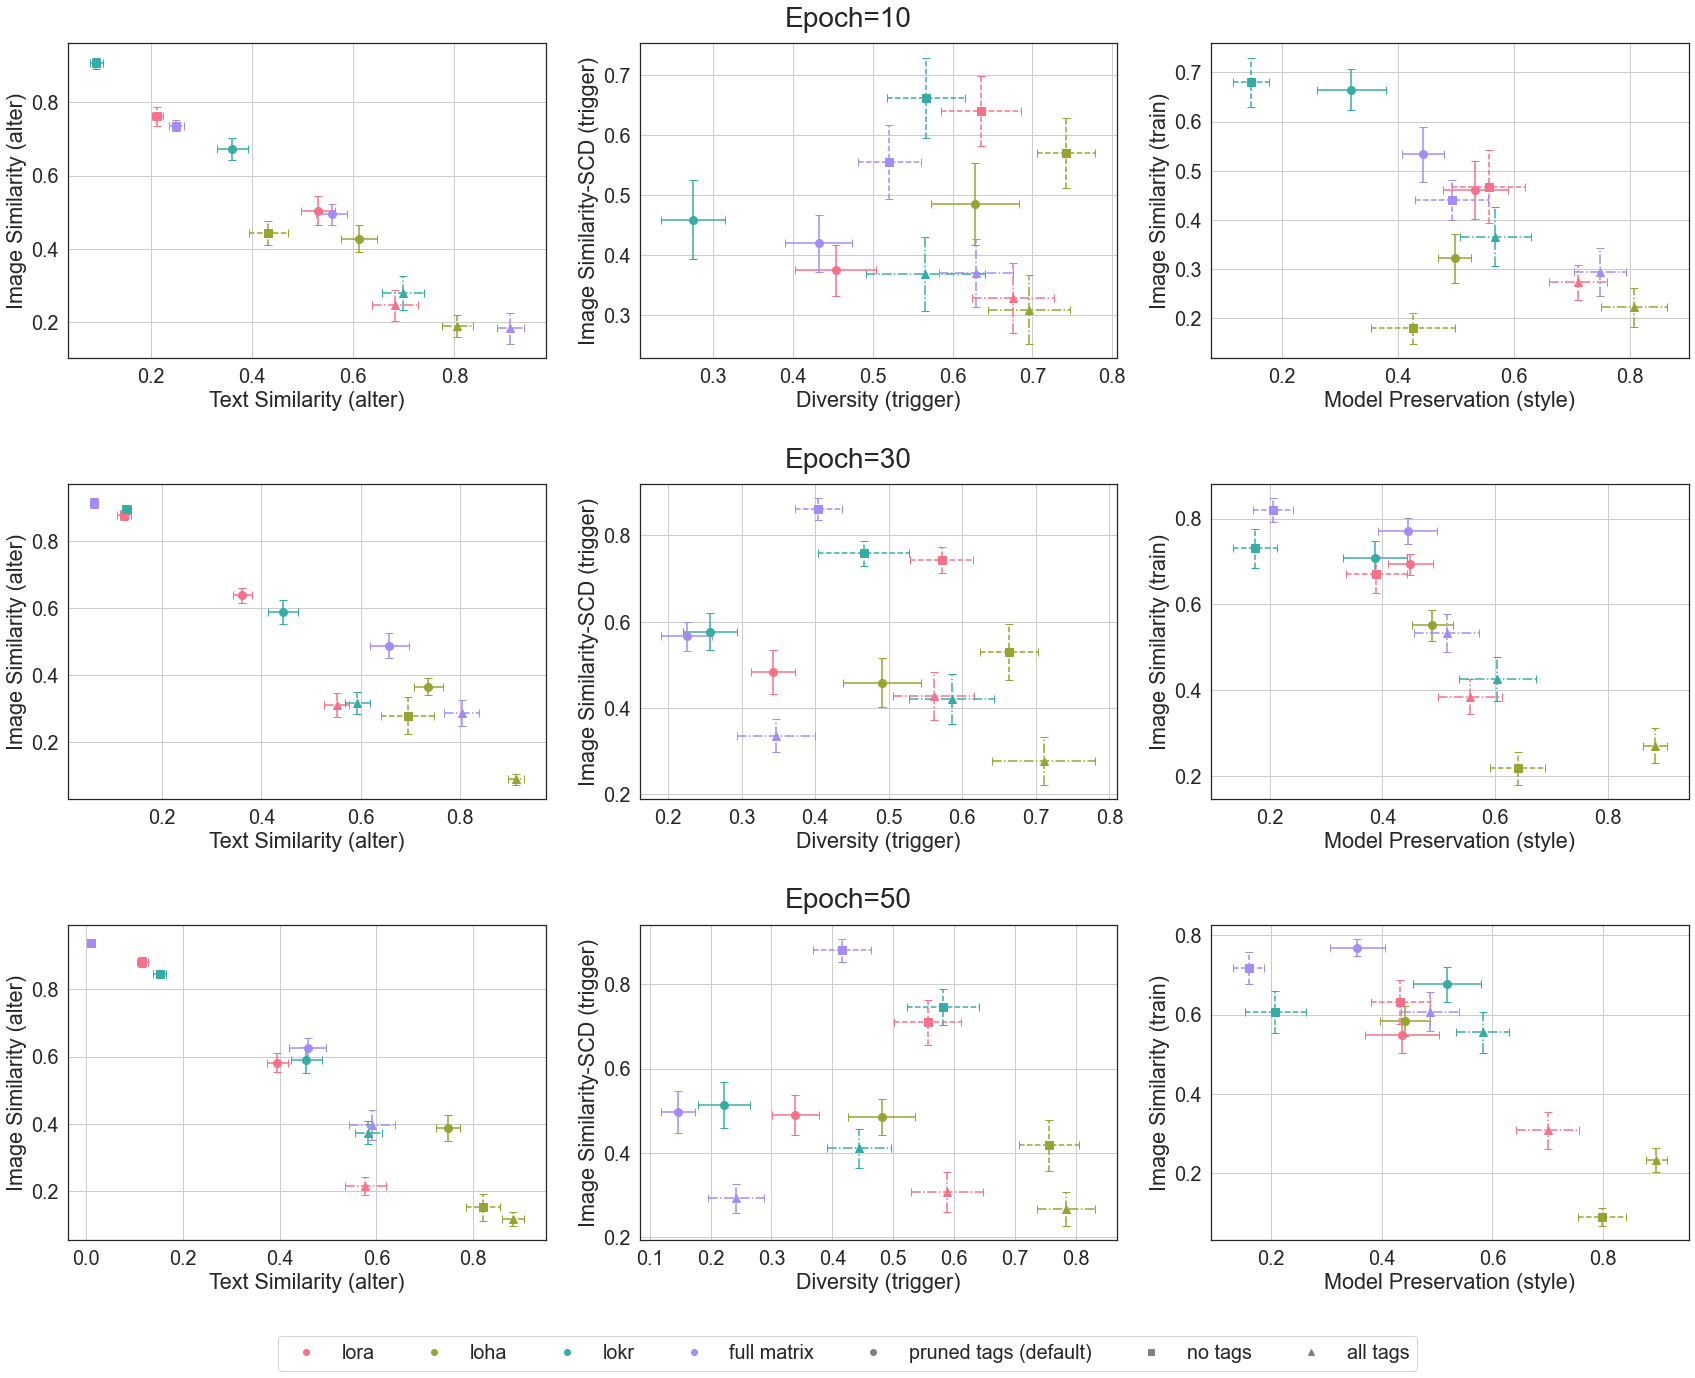

In [74]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Caption',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'caption_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

# Weight

In [128]:
metrics_file = '../../metrics/reweight_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-reweight/'
os.makedirs(save_dir, exist_ok=True)

In [129]:
keywords_to_exclude = ['1002', '1012', '1022']
metrics_processed = metrics_processed[metrics_processed['Config'].apply(
    lambda x: not any(keyword in x for keyword in keywords_to_exclude))]
print(metrics_processed.shape)

(4212, 30)


In [130]:
with display_all_columns():
    display(metrics_processed)

Config  Algo    Preset        Lr      Dim Alpha  \
Architecture                                                                  
Condition                                                                     
0             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
1             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
2             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
3             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
4             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
...                            ...   ...       ...       ...      ...   ...   
7366              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7367              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7368              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7369              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7370              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   

             Factor Caption Seed Step Weight Category                  Class  \
Architecture                                                                   
Condition                                                                      
0               8.0    .txt    a   30   1.00    scene            scene_canal   
1               8.0    .txt    a   30   1.00    scene           scene_garden   
2               8.0    .txt    a   30   1.00    scene        scene_waterfall   
3               8.0    .txt    a   30   1.00    scene           scene_castle   
4               8.0    .txt    a   30   1.00    scene       scene_sculpture1   
...             ...     ...  ...  ...    ...      ...                    ...   
7366            NaN    .txt    b   10   0.85    style                ukiyo_e   
7367            NaN    .txt    b   10   0.85    style          impressionism   
7368            NaN    .txt    b   10   0.85    style  vladimir_borovikovsky   
7369            NaN    .txt    b   10   0.85    style         pencil_drawing   
7370            NaN    .txt    b   10   0.85    style                  ghibi   

             Subclass Image Similarity                      \
Architecture            DINOv2-padding                       
Condition                           in       out   trigger   
0                             0.297872  0.734043  0.484043   
1                             0.430851  0.452128  0.797872   
2                             0.069149  0.606383  0.361702   
3                             0.601064  0.648936  0.180851   
4                             0.069149  0.707447  0.122340   
...               ...              ...       ...       ...   
7366                          0.877660  0.329787  0.047872   
7367                          0.904255  0.244681  0.388298   
7368                          0.936170  0.739362  0.914894   
7369                          0.627660  0.074468  0.489362   
7370                          0.792553  0.276596  0.340426   

             Squared Centroid Distance                     Style Loss          \
Architecture            DINOv2-padding                          Vgg19           
Condition                           in       out   trigger base model  in out   
0                             0.175532  0.462766  0.191489   0.696809 NaN NaN   
1                             0.313830  0.351064  0.574468   0.468085 NaN NaN   
2                             0.058511  0.313830  0.196809   0.356383 NaN NaN   
3                             0.398936  0.547872  0.218085   0.574468 NaN NaN   
4                             0.058511  0.547872  0.063830   0.308511 NaN NaN   
...                                ...       ...       ...        ...  ..  ..   
7366                          0.063830  0.611702  0.069149        NaN NaN NaN   
7367                          0.792553  0.654255  0.595745        NaN NaN NaN   
7368                          0.994681  

In [131]:
category = 'scene'

extra_conodition = {
    'Category': category,
}

In [132]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Weight'],
                                                 extra_conodition)

shape_mapping = {
    1: 'scale=1',
    0.85: 'scale=0.85',
    0.7: 'scale=0.7',
}

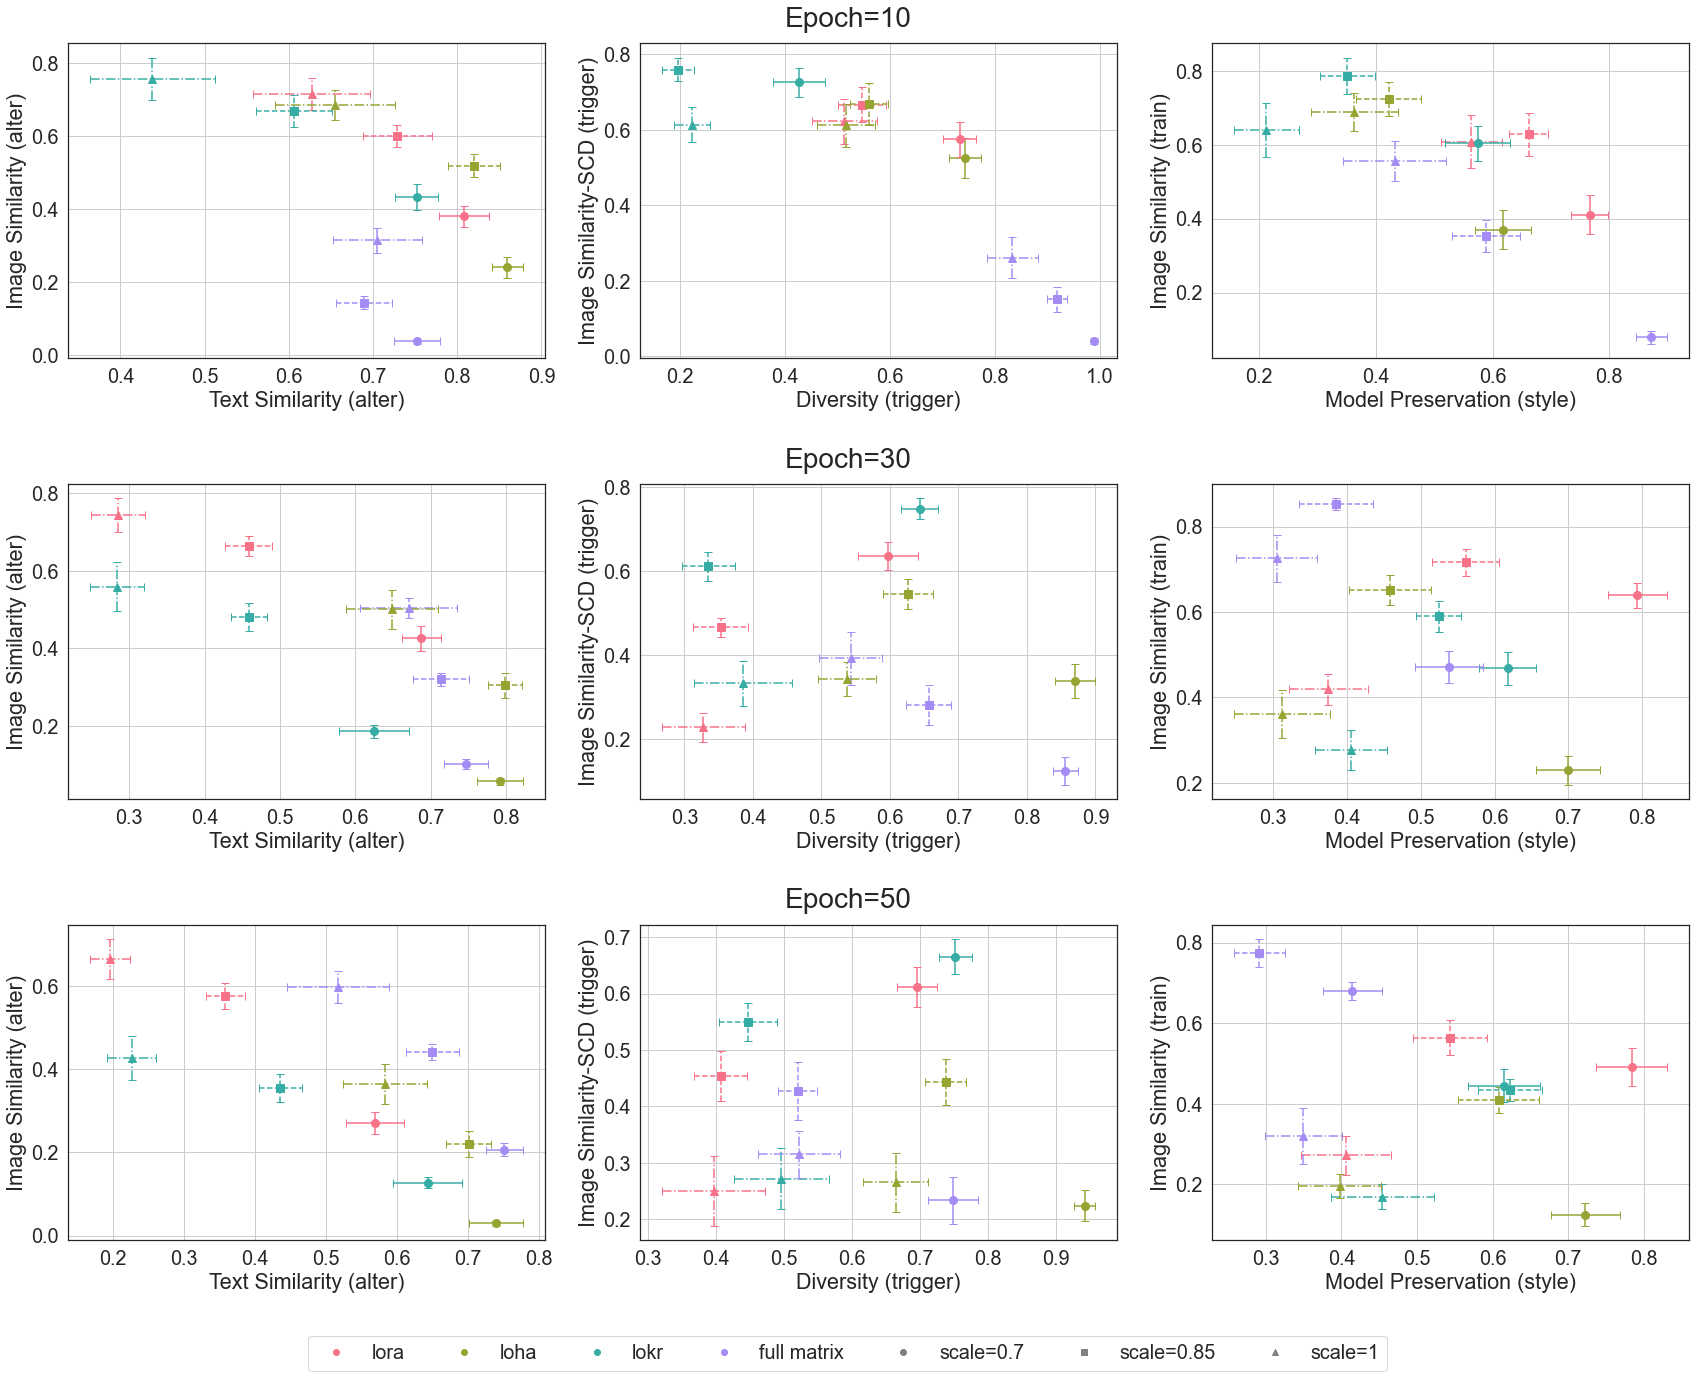

In [133]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Weight',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'reweight-base_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

### Larger network

In [113]:
metrics_file = '../../metrics/reweight_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-reweight/'
os.makedirs(save_dir, exist_ok=True)

In [114]:
keywords_to_exclude = ['1001', '1011', '1021']
metrics_processed = metrics_processed[metrics_processed['Config'].apply(
    lambda x: not any(keyword in x for keyword in keywords_to_exclude))]
print(metrics_processed.shape)

(4212, 30)


In [125]:
category = 'anime'

extra_conodition = {
    'Category': category,
}

In [126]:
metrics_aggregated = filter_config_and_aggregate(
    metrics_processed, ['Weight'],
    extra_conodition,
    default_keywords=['1002', '1012', '1022', '1031'])

shape_mapping = {
    1: 'scale=1',
    0.85: 'scale=0.85',
    0.7: 'scale=0.7',
}

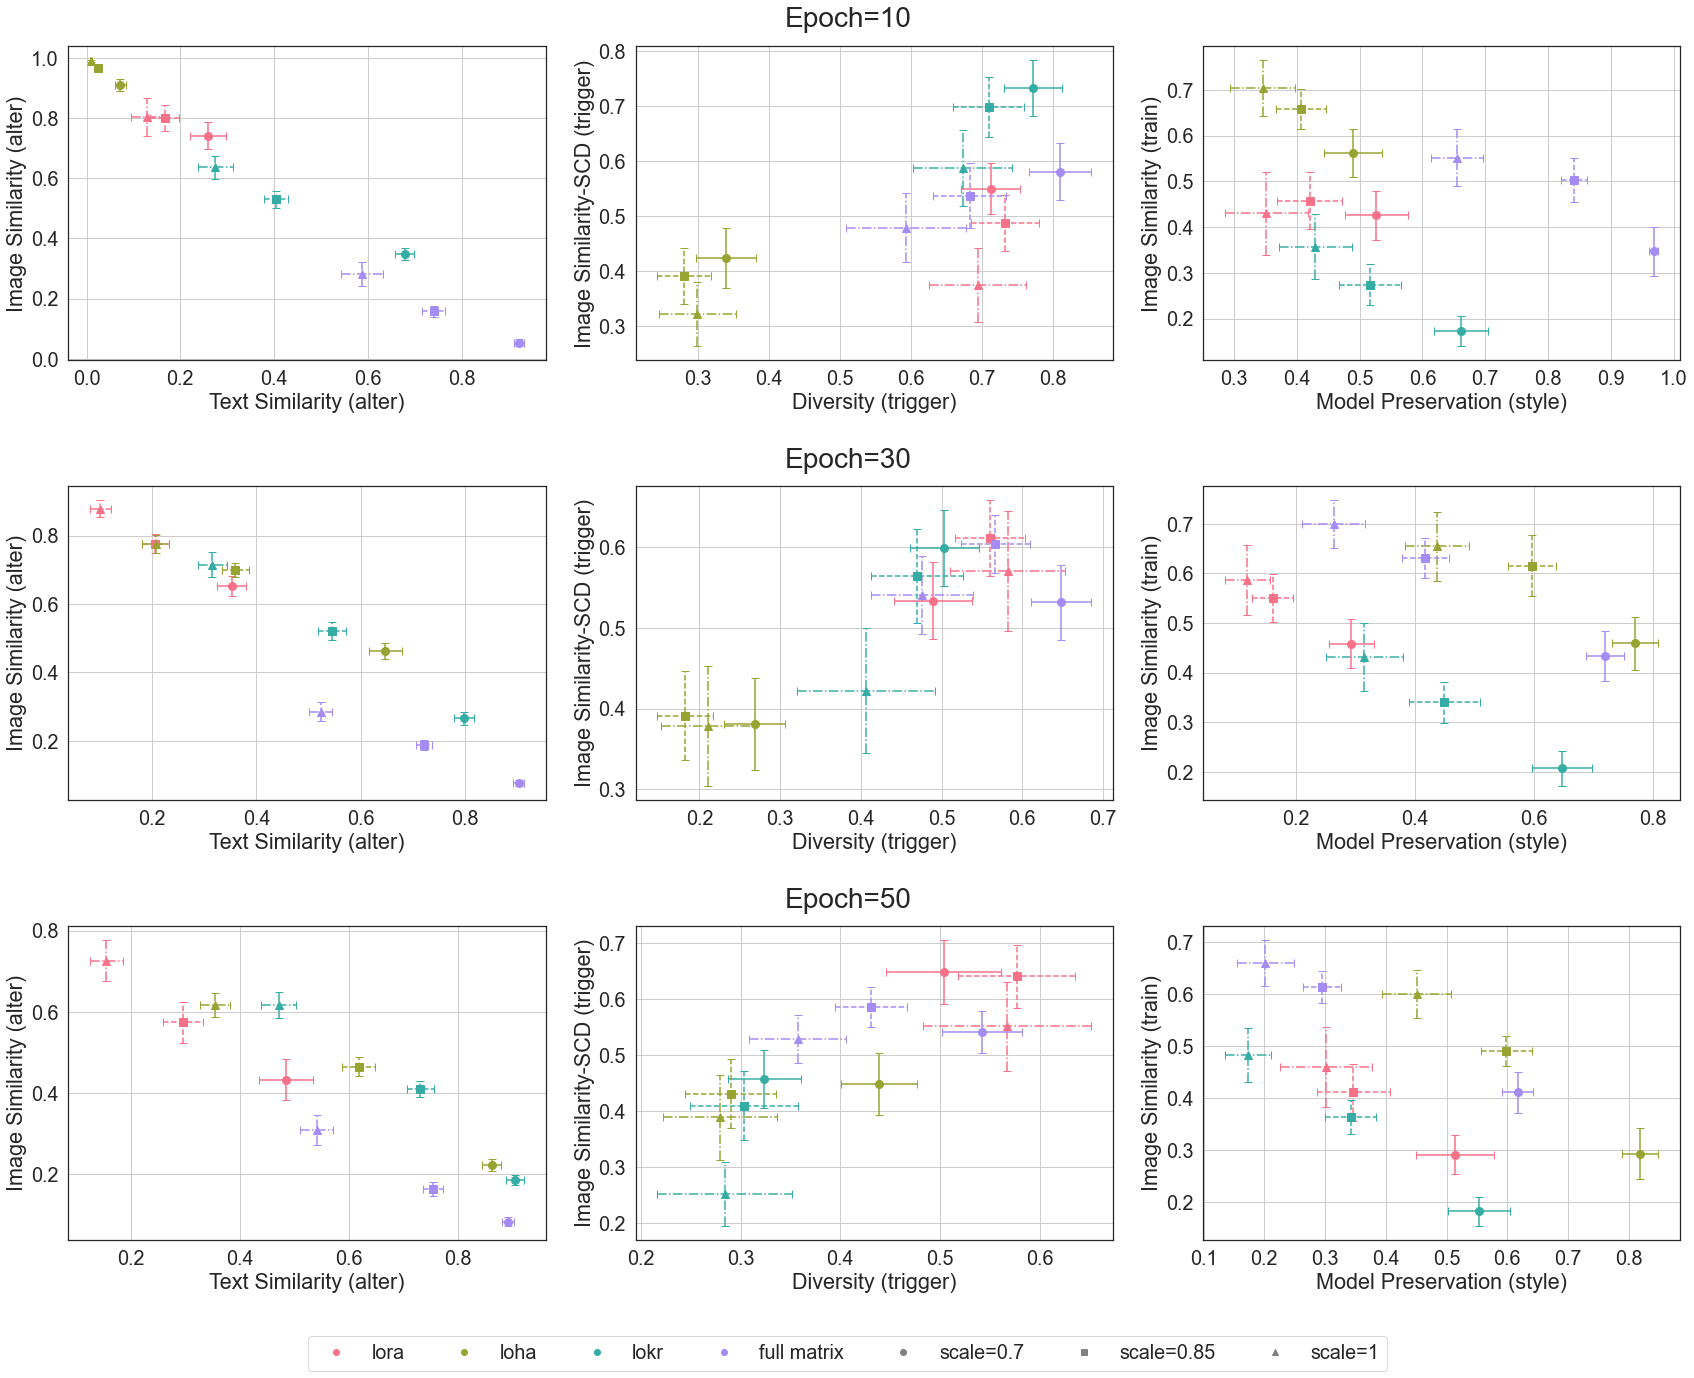

In [127]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Weight',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'reweight-large_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)